<h1 style="color: #FF8C00;">00 |</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

<h1 style="color: #FF8C00;">01 | Data Extraction</h1>

In [4]:
data = pd.read_csv("nasa_exoplanets.csv")

In [5]:
def snake_columns(data): 
    """
    returns the columns in snake case
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [6]:
open_data(data)

Data shape is (5250, 13).

name                  object
distance             float64
stellar_magnitude    float64
planet_type           object
discovery_year         int64
mass_multiplier      float64
mass_wrt              object
radius_multiplier    float64
radius_wrt            object
orbital_radius       float64
orbital_period       float64
eccentricity         float64
detection_method      object
dtype: object

Data row sample and full columns:


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
2081,Kepler-1213 b,2635.0,13.416,Super Earth,2016,1.81,Earth,1.190,Earth,0.0635,0.014511,0.00,Transit
1583,K2-334 b,1213.0,11.842,Neptune-like,2018,27.20,Earth,0.504,Jupiter,NaN,0.013963,0.00,Transit
1495,K2-252 b,746.0,12.930,Super Earth,2018,3.68,Earth,1.740,Earth,0.1041,0.037782,0.00,Transit
1930,Kepler-109 c,1549.0,12.398,Neptune-like,2014,21.80,Earth,0.225,Jupiter,0.1506,0.058042,0.03,Transit
4363,Kepler-913 c,3235.0,15.522,Neptune-like,2021,14.20,Earth,0.344,Jupiter,0.0699,0.016153,0.00,Transit


In [7]:
explore_data(data)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
name,0,0
distance,17,0
stellar_magnitude,161,0
planet_type,0,0
discovery_year,0,0
mass_multiplier,23,0
mass_wrt,23,0
radius_multiplier,17,0
radius_wrt,17,0
orbital_radius,289,0


In [8]:
df = data.copy()

In [9]:
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


<h1 style="color: #FF8C00;">02| Data Cleaning </h1>

In [11]:
df = df.dropna()

In [12]:
df.loc[:, 'mass_in_earths'] = np.where(
    df['mass_wrt'] == 'Earth',
    df['mass_multiplier'],
    np.where(
        df['mass_wrt'] == 'Jupiter',
        df['mass_multiplier'] * 318,
        np.nan 
    )
)

/var/folders/cj/_ljqqgzj7bvdlj6sc0_8wd080000gn/T/ipykernel_14120/4055405171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mass_in_earths'] = np.where(


In [13]:
explore_data(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
name,0,0
distance,0,0
stellar_magnitude,0,0
planet_type,0,0
discovery_year,0,0
mass_multiplier,0,0
mass_wrt,0,0
radius_multiplier,0,0
radius_wrt,0,0
orbital_radius,0,0


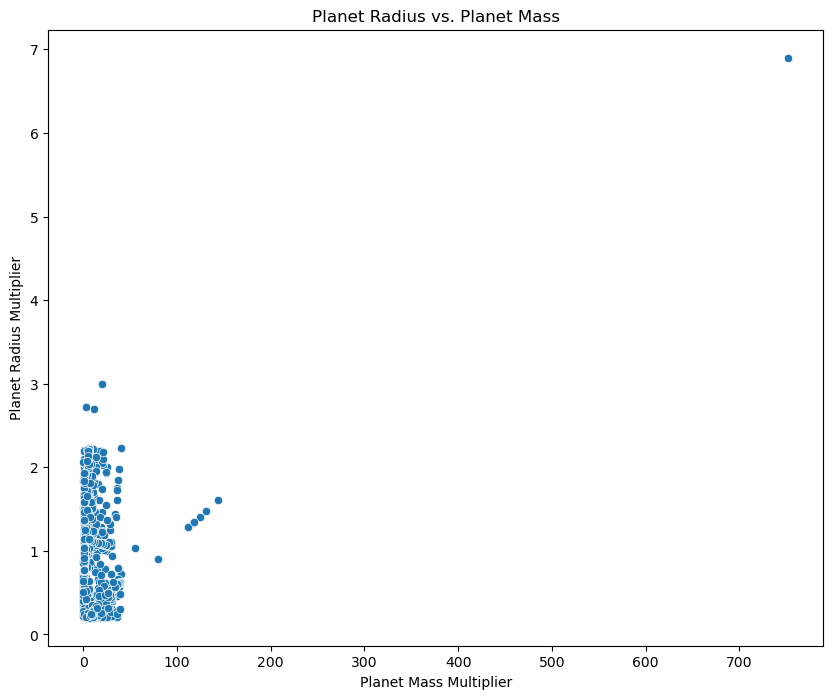

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='mass_multiplier', y='radius_multiplier')
plt.title("Planet Radius vs. Planet Mass")
plt.xlabel("Planet Mass Multiplier")
plt.ylabel("Planet Radius Multiplier")
plt.show()

In [15]:
# new column for mass and radius
df.loc[:, 'mass_radius_combined'] = df['mass_multiplier'] * df['radius_multiplier']

# biggest planet by combined mass and radius
biggest_by_mass_radius = df.loc[df['mass_radius_combined'].idxmax()]

biggest_by_mass_radius

/var/folders/cj/_ljqqgzj7bvdlj6sc0_8wd080000gn/T/ipykernel_14120/3047262042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mass_radius_combined'] = df['mass_multiplier'] * df['radius_multiplier']


name                       HD 100546 b
distance                         358.0
stellar_magnitude                 6.69
planet_type                  Gas Giant
discovery_year                    2014
mass_multiplier                  752.0
mass_wrt                       Jupiter
radius_multiplier                  6.9
radius_wrt                     Jupiter
orbital_radius                    53.0
orbital_period                   249.2
eccentricity                       0.0
detection_method        Direct Imaging
mass_in_earths                239136.0
mass_radius_combined            5188.8
Name: 466, dtype: object

In [16]:
planet_row = df.loc[df['name'] == 'HD 100546 b']
planet_row

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,mass_in_earths,mass_radius_combined
466,HD 100546 b,358.0,6.69,Gas Giant,2014,752.0,Jupiter,6.9,Jupiter,53.0,249.2,0.0,Direct Imaging,239136.0,5188.8


In [17]:
# rop row 466
df = df.drop(index=466)

df = df.reset_index(drop=True)

In [18]:
# unique for planet_type
unique_planet_types = df['planet_type'].unique()

# unique for detection_method
unique_detection_methods = df['detection_method'].unique()
unique_detection_methods

array(['Radial Velocity', 'Direct Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics',
       'Transit Timing Variations', 'Orbital Brightness Modulation',
       'Gravitational Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [19]:
unique_planet_types

array(['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial'],
      dtype=object)

In [20]:
# new feature for planet_type
df['planet_type_numeric'] = df['planet_type'].map(
    {value: idx for idx, value in enumerate(unique_planet_types, start=0)}
)

# new feature for detection_method
df['detection_method_numeric'] = df['detection_method'].map(
    {value: idx for idx, value in enumerate(unique_detection_methods, start=0)}
)

In [21]:
# mapping for planet_type
planet_type_mapping = {value: idx for idx, value in enumerate(df['planet_type'].unique(), start=0)}

# mapping for detection_method
detection_method_mapping = {value: idx for idx, value in enumerate(df['detection_method'].unique(), start=0)}

In [22]:
print(planet_type_mapping)
print(detection_method_mapping)

{'Gas Giant': 0, 'Super Earth': 1, 'Neptune-like': 2, 'Terrestrial': 3}
{'Radial Velocity': 0, 'Direct Imaging': 1, 'Eclipse Timing Variations': 2, 'Transit': 3, 'Astrometry': 4, 'Disk Kinematics': 5, 'Transit Timing Variations': 6, 'Orbital Brightness Modulation': 7, 'Gravitational Microlensing': 8, 'Pulsar Timing': 9, 'Pulsation Timing Variations': 10}


In [23]:
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,mass_in_earths,mass_radius_combined,planet_type_numeric,detection_method_numeric
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity,6169.20000,20.952000,0,0
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity,4687.32000,16.066600,0,0
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity,1526.40000,5.520000,0,0
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity,2588.14158,9.115467,0,0
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity,566.04000,2.136000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit,225.46200,0.973457,0,3
4760,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging,2003.40000,7.182000,0,1
4761,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity,0.70000,0.639100,3,0
4762,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity,1.14000,1.197000,1,0


<h1 style="color: #FF8C00;">03 | EDA </h1>

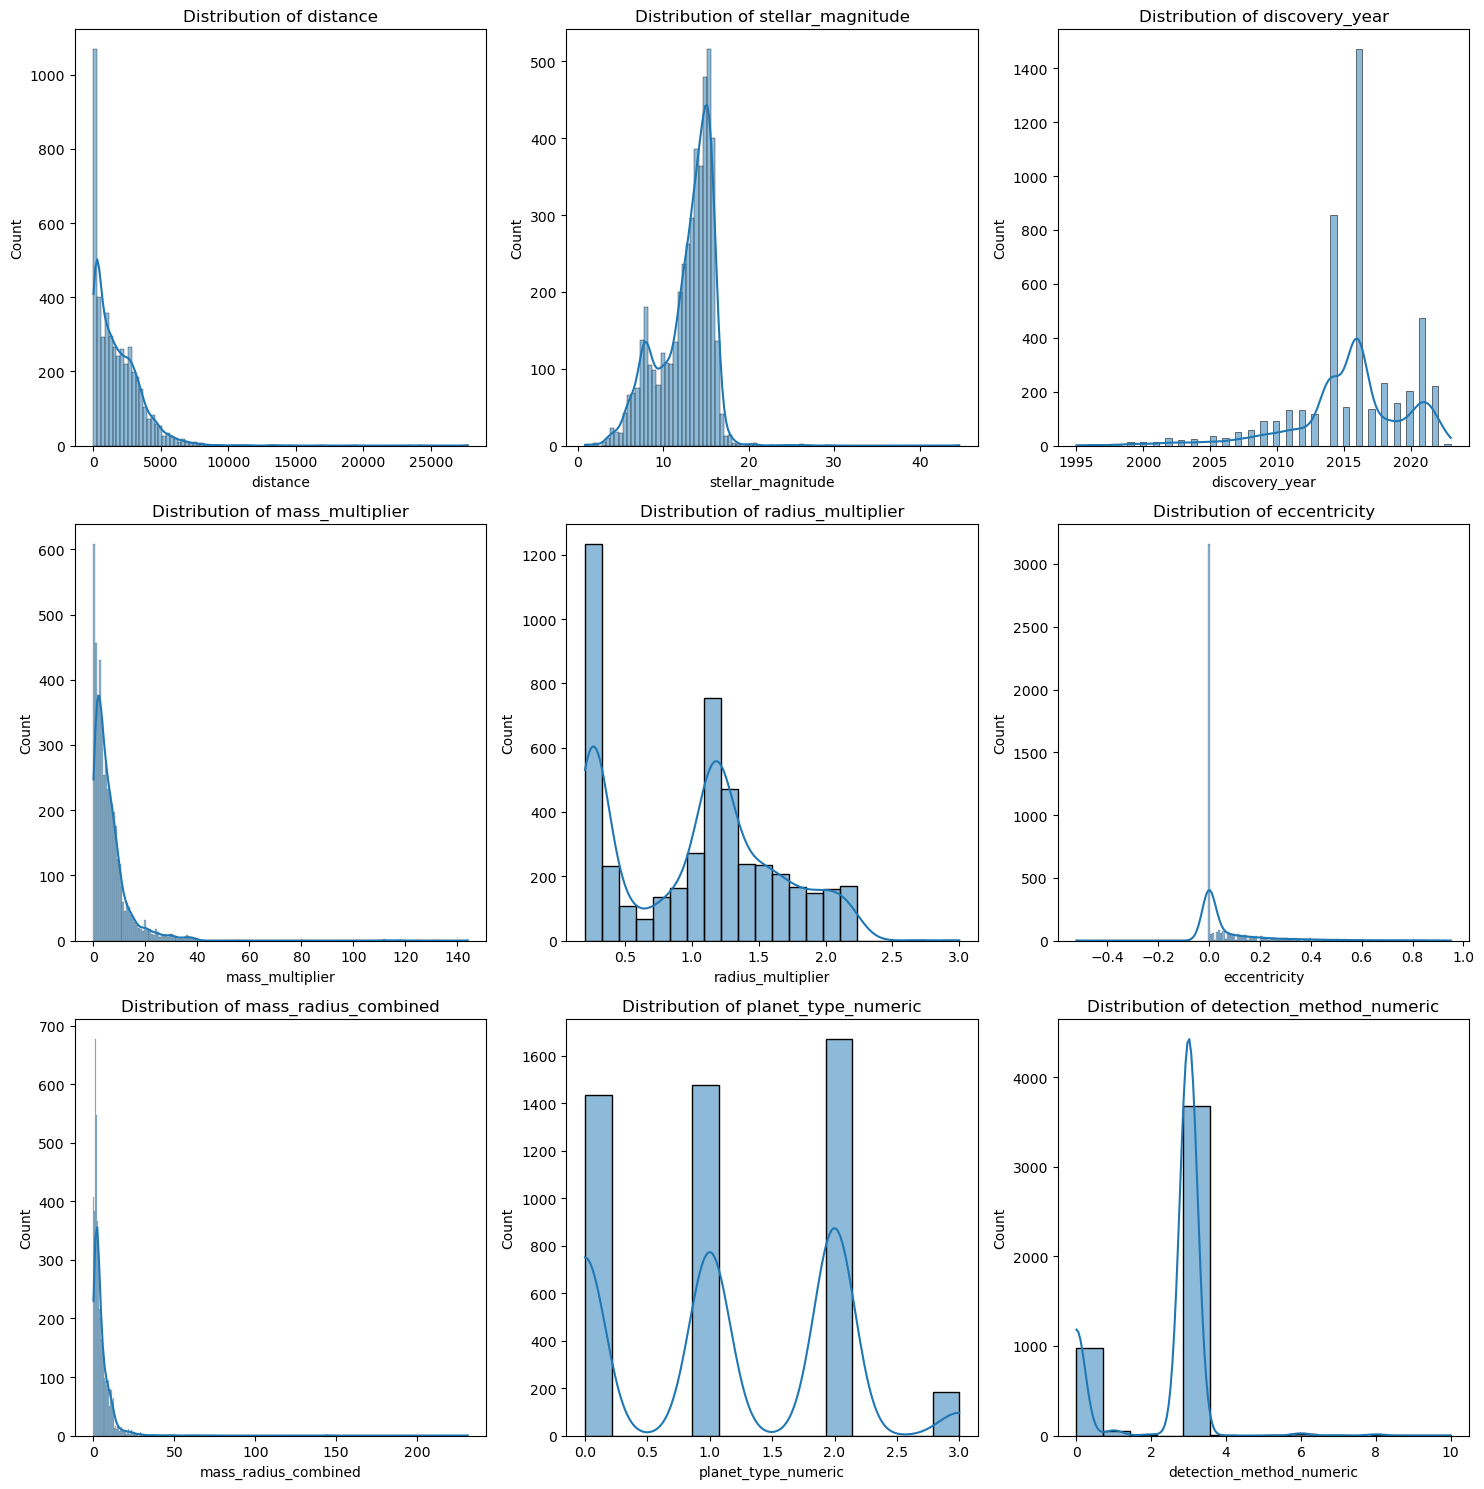

In [25]:
# ploting numeric features
numeric_cols = [
    'distance',         
    'stellar_magnitude',
    'discovery_year',   
    'mass_multiplier',  
    'radius_multiplier',
    'eccentricity',
    'mass_radius_combined',
    'planet_type_numeric',
    'detection_method_numeric'
]

# showing 3 per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

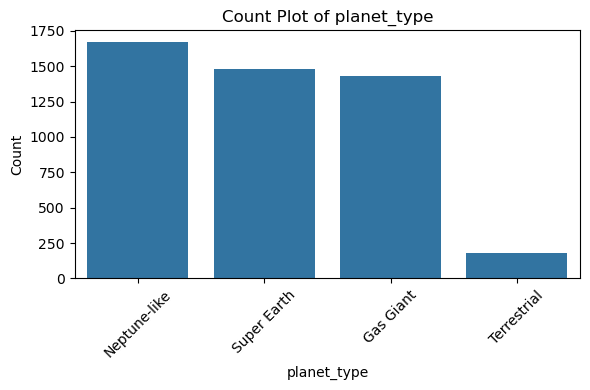

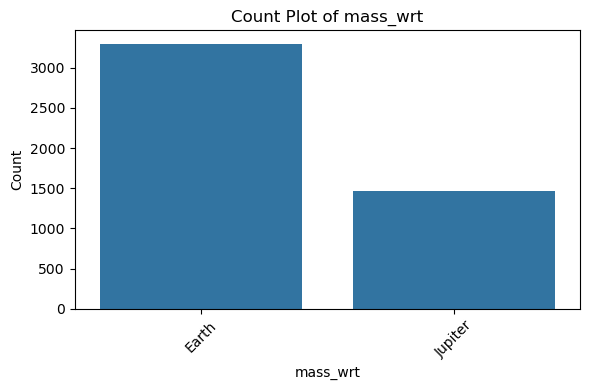

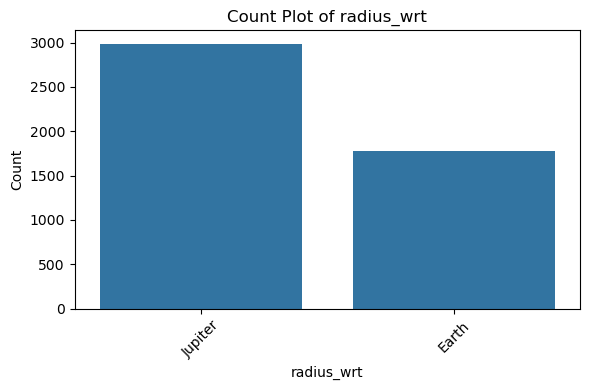

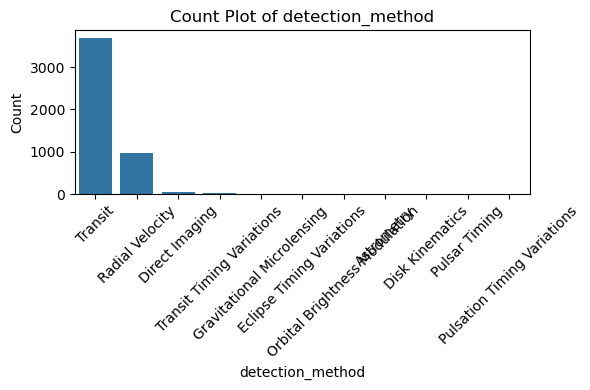

In [26]:
categorical_cols = [
    'planet_type',
    'mass_wrt',
    'radius_wrt',
    'detection_method'
]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    
    order = df[col].value_counts().index
    
    sns.countplot(x=col, data=df, order=order)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

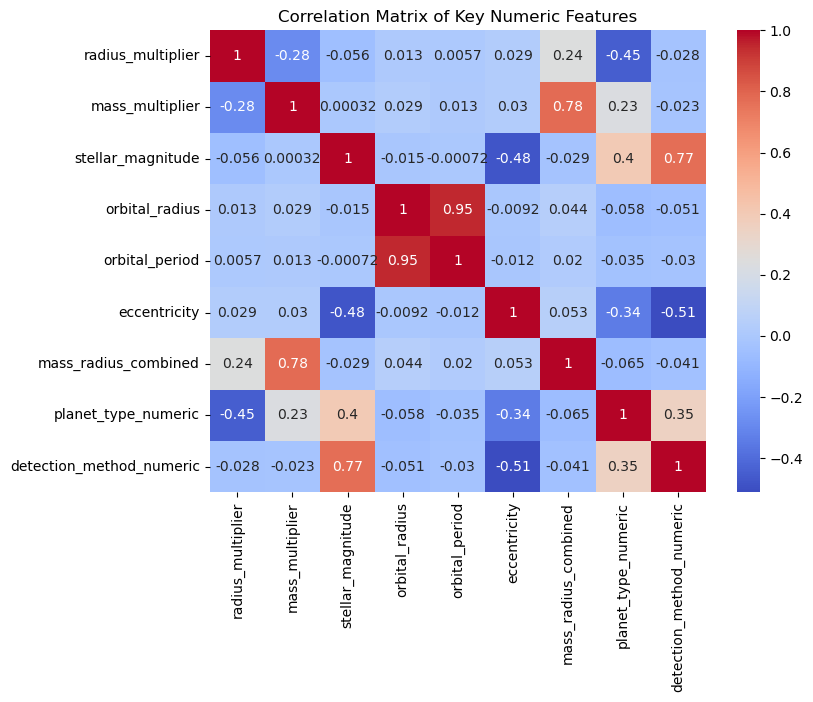

In [27]:
numeric_cols = ['radius_multiplier', 'mass_multiplier', 'stellar_magnitude', 
                'orbital_radius', 'orbital_period', 'eccentricity', 'mass_radius_combined', 'planet_type_numeric', 'detection_method_numeric']
df_numeric = df[numeric_cols].dropna()

corr_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Numeric Features")
plt.show()

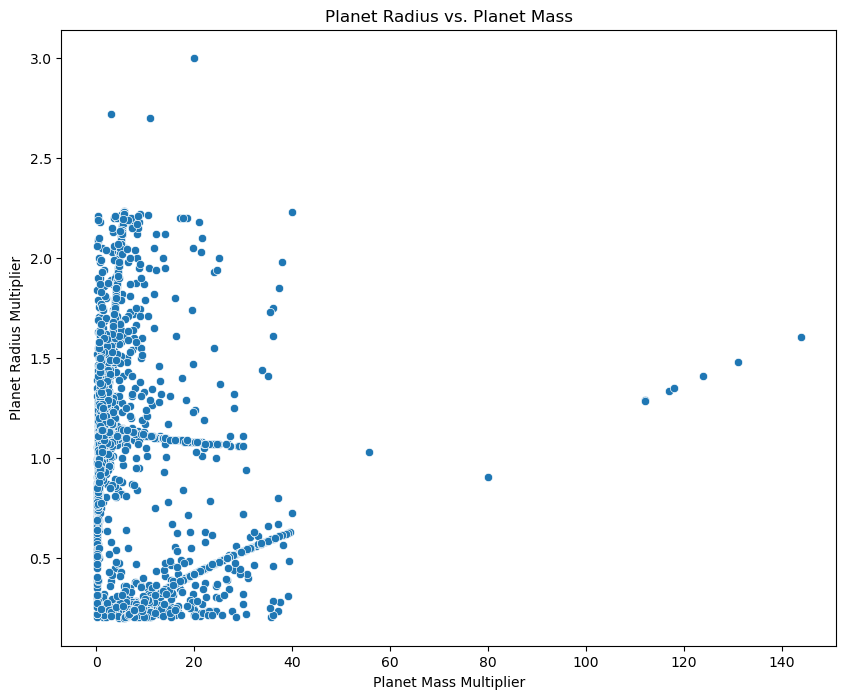

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='mass_multiplier', y='radius_multiplier')
plt.title("Planet Radius vs. Planet Mass")
plt.xlabel("Planet Mass Multiplier")
plt.ylabel("Planet Radius Multiplier")
plt.show()

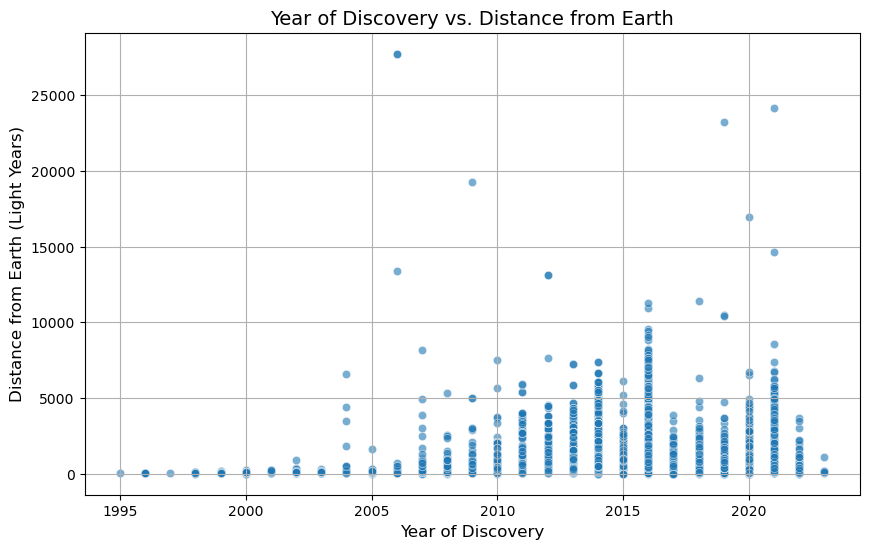

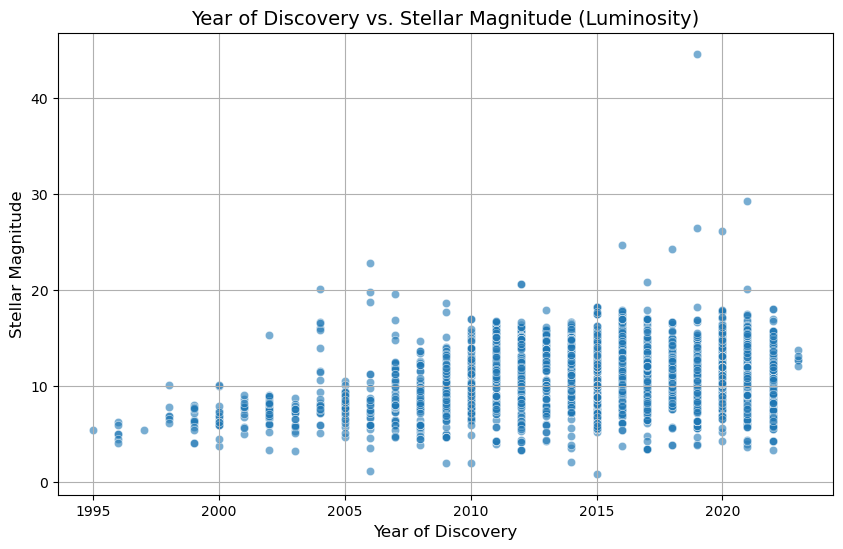

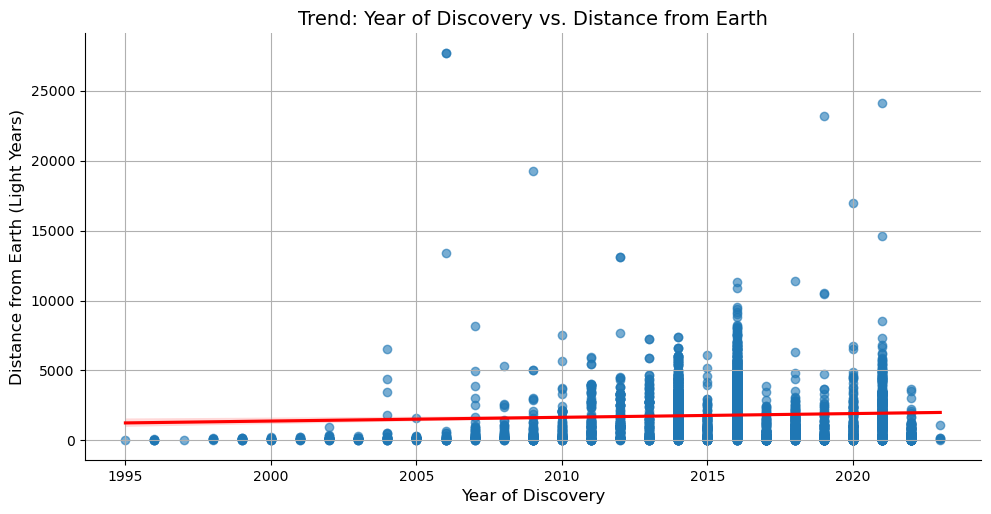

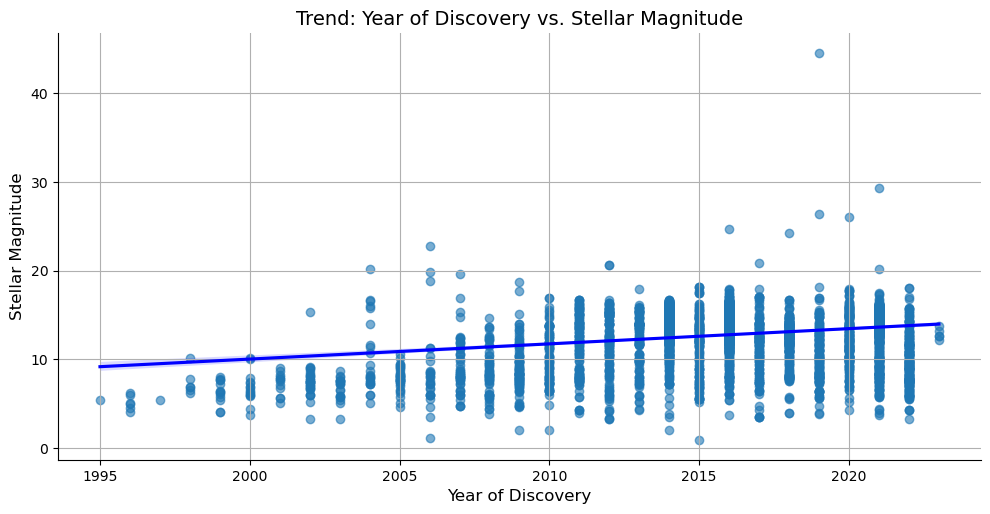

In [29]:
# year of discovery vs. distance from Earth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discovery_year', y='distance', alpha=0.6)
plt.title('Year of Discovery vs. Distance from Earth', fontsize=14)
plt.xlabel('Year of Discovery', fontsize=12)
plt.ylabel('Distance from Earth (Light Years)', fontsize=12)
plt.grid(True)
plt.show()

# year of discovery vs. stellar magnitude (luminosity)
if 'stellar_magnitude' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='discovery_year', y='stellar_magnitude', alpha=0.6)
    plt.title('Year of Discovery vs. Stellar Magnitude (Luminosity)', fontsize=14)
    plt.xlabel('Year of Discovery', fontsize=12)
    plt.ylabel('Stellar Magnitude', fontsize=12)
    plt.grid(True)
    plt.show()

# trends overtime
sns.lmplot(data=df, x='discovery_year', y='distance', aspect=2, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.title('Trend: Year of Discovery vs. Distance from Earth', fontsize=14)
plt.xlabel('Year of Discovery', fontsize=12)
plt.ylabel('Distance from Earth (Light Years)', fontsize=12)
plt.grid(True)
plt.show()

if 'stellar_magnitude' in df.columns:
    sns.lmplot(data=df, x='discovery_year', y='stellar_magnitude', aspect=2, line_kws={'color': 'blue'}, scatter_kws={'alpha': 0.6})
    plt.title('Trend: Year of Discovery vs. Stellar Magnitude', fontsize=14)
    plt.xlabel('Year of Discovery', fontsize=12)
    plt.ylabel('Stellar Magnitude', fontsize=12)
    plt.grid(True)
    plt.show()

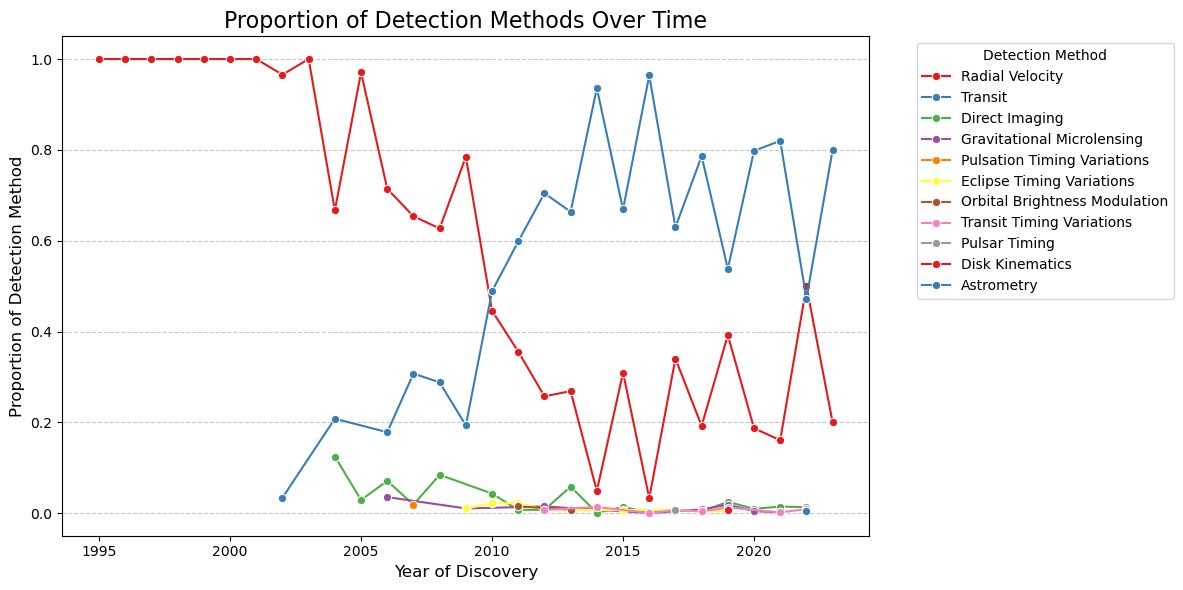

In [30]:
# proportion of methods per year
method_counts = df.groupby(['discovery_year', 'detection_method']).size().reset_index(name='count')
total_counts = df.groupby('discovery_year').size().reset_index(name='total')
merged = method_counts.merge(total_counts, on='discovery_year')
merged['proportion'] = merged['count'] / merged['total']

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x='discovery_year', y='proportion', hue='detection_method', palette='Set1', marker='o')
plt.title('Proportion of Detection Methods Over Time', fontsize=16)
plt.xlabel('Year of Discovery', fontsize=12)
plt.ylabel('Proportion of Detection Method', fontsize=12)
plt.legend(title='Detection Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

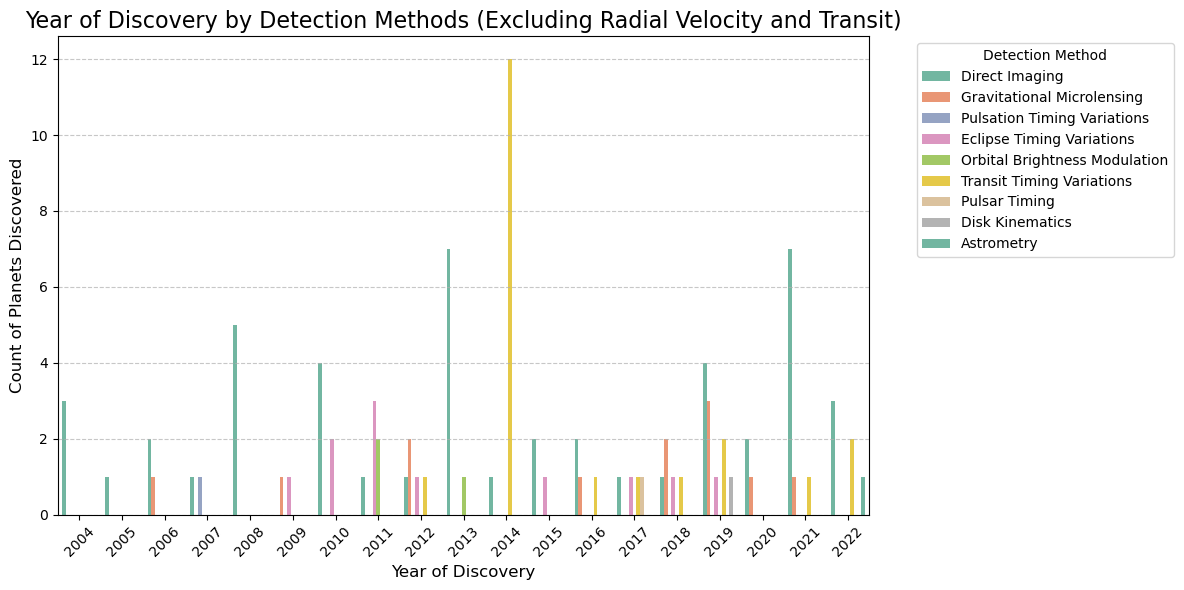

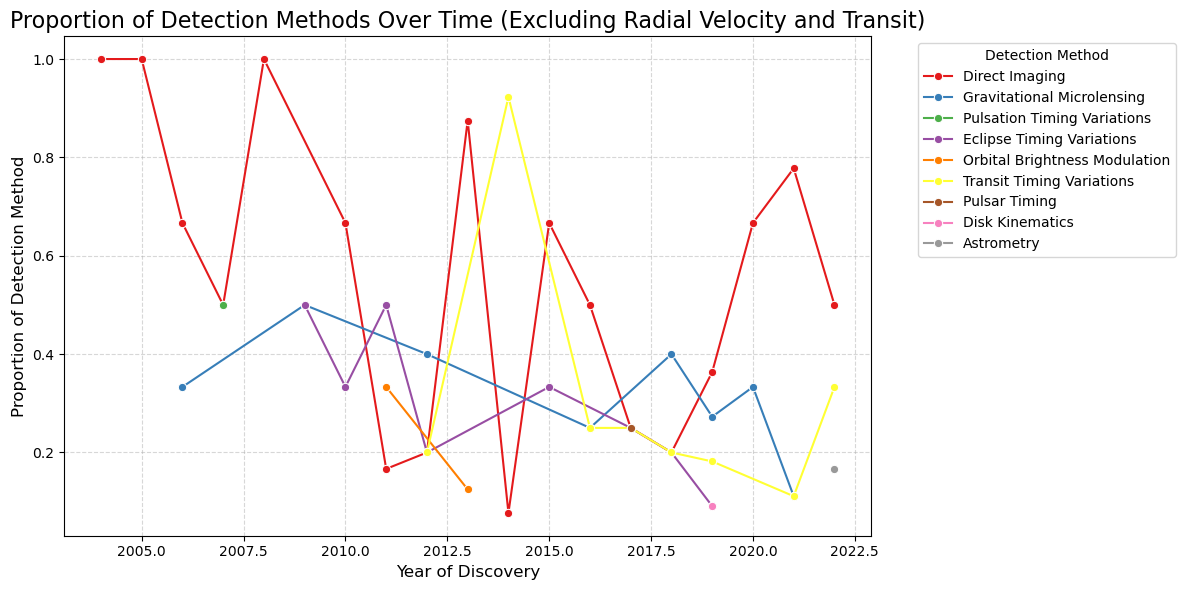

In [31]:
# delete radial velocity and transit
df_filtered = df[~df['detection_method'].isin(['Radial Velocity', 'Transit'])]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='discovery_year', hue='detection_method', palette='Set2')
plt.title('Year of Discovery by Detection Methods (Excluding Radial Velocity and Transit)', fontsize=16)
plt.xlabel('Year of Discovery', fontsize=12)
plt.ylabel('Count of Planets Discovered', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Detection Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# proportion of methods per year
method_counts = df_filtered.groupby(['discovery_year', 'detection_method']).size().reset_index(name='count')
total_counts = df_filtered.groupby('discovery_year').size().reset_index(name='total')
merged = method_counts.merge(total_counts, on='discovery_year')
merged['proportion'] = merged['count'] / merged['total']

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x='discovery_year', y='proportion', hue='detection_method', palette='Set1', marker='o')
plt.title('Proportion of Detection Methods Over Time (Excluding Radial Velocity and Transit)', fontsize=16)
plt.xlabel('Year of Discovery', fontsize=12)
plt.ylabel('Proportion of Detection Method', fontsize=12)
plt.legend(title='Detection Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

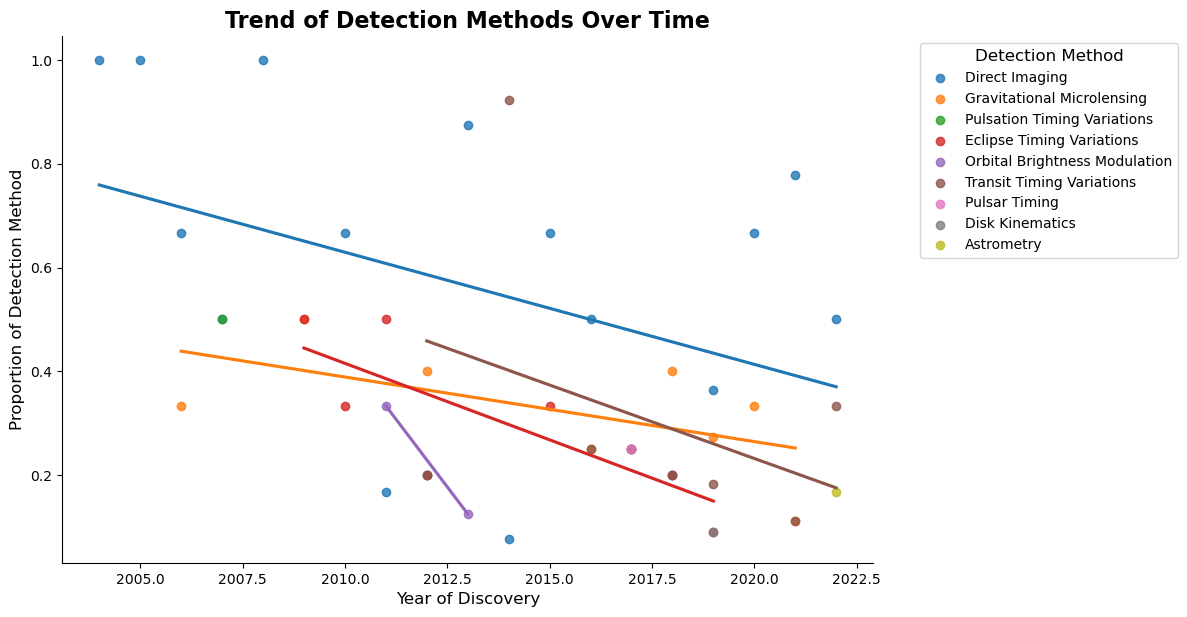

In [32]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)

    sns.lmplot(
        data=merged,
        x='discovery_year',
        y='proportion',
        hue='detection_method',
        markers='o',
        height=6,
        aspect=1.5,
        ci=None,
        legend=False
    )

    plt.title('Trend of Detection Methods Over Time', fontsize=16, weight='bold')
    plt.xlabel('Year of Discovery', fontsize=12)
    plt.ylabel('Proportion of Detection Method', fontsize=12)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        handles=handles,
        labels=labels,
        title='Detection Method',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=10,
        title_fontsize=12
    )

    plt.tight_layout(rect=[1, 1, 1, 1])
    plt.show()

<h1 style="color: #FF8C00;">04 | Data Preprocessing </h1>

In [34]:
df_ml = df.copy()

df_ml.to_csv('dataset_for_ml.csv', index=False)

In [35]:
features = ['mass_multiplier', 'radius_multiplier', 'stellar_magnitude', 
            'orbital_radius', 'eccentricity', 'detection_method_numeric']

target = 'planet_type_numeric'

# filter
df_ml = df_ml[features + [target]]

X = df_ml[features]
y = df_ml[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Testing Data Shape: {X_test_scaled.shape}")

Training Data Shape: (3811, 6)
Testing Data Shape: (953, 6)


<h1 style="color: #FF8C00;">05 | Modeling</h1>

<h2 style="color: #FF6347;">XGB Classifier</h2>

In [86]:
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.8
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test data accuracy: ", xgb_model.score(X_test, y_test))
print("Train data accuracy: ", xgb_model.score(X_train, y_train))

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.4f}")

Accuracy: 0.9223504721930745
Test data accuracy:  0.9223504721930745
Train data accuracy:  0.9391235896090265
Cross-validated accuracy: 0.9289


<h2 style="color: #FF6347;">Random Forest Classifier</h2>

In [89]:
rf_classifier = RandomForestClassifier(
    random_state=42, 
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test data accuracy: ", rf_classifier.score(X_test, y_test))
print("Train data accuracy: ", rf_classifier.score(X_train, y_train))

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.4f}")

Accuracy: 0.9328436516264428
Test data accuracy:  0.9328436516264428
Train data accuracy:  0.9753345578588297
Cross-validated accuracy: 0.9336


<h2 style="color: #FF6347;">Gradient Boosting Classifier</h2>

In [91]:
gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test data accuracy: ", gradient_boosting_model.score(X_test, y_test))
print("Train data accuracy: ", gradient_boosting_model.score(X_train, y_train))

cv_scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.4f}")

Accuracy: 0.9475341028331584
Test data accuracy:  0.9475341028331584
Train data accuracy:  0.9942272369456836
Cross-validated accuracy: 0.9459


<h1 style="color: #FF8C00;">06 | Improving the Model</h1>

<h2 style="color: #FF6347;">Hyperparameter Tuning</h2>

In [51]:
max_depth = range(1, 30)

test = []
train = []

for depth in max_depth:
    gradient_boosting_model = GradientBoostingClassifier(
        random_state=42,
        n_estimators=300,
        learning_rate=0.1,
        max_depth=depth
    )
    
    gradient_boosting_model.fit(X_train, y_train)
    
    train_r2 = gradient_boosting_model.score(X_train, y_train)
    test_r2 = gradient_boosting_model.score(X_test, y_test)
    
    train.append(train_r2)
    test.append(test_r2)

print("Hyperparameter Tuning Results (max_depth):")
for i, depth in enumerate(max_depth):
    print(f"max_depth: {depth} | Train: {train[i]:.4f} | Test: {test[i]:.4f}")

Hyperparameter Tuning Results (max_depth):
max_depth: 1 | Train: 0.9247 | Test: 0.9045
max_depth: 2 | Train: 0.9774 | Test: 0.9444
max_depth: 3 | Train: 0.9979 | Test: 0.9454
max_depth: 4 | Train: 1.0000 | Test: 0.9475
max_depth: 5 | Train: 1.0000 | Test: 0.9475
max_depth: 6 | Train: 1.0000 | Test: 0.9517
max_depth: 7 | Train: 1.0000 | Test: 0.9465
max_depth: 8 | Train: 1.0000 | Test: 0.9507
max_depth: 9 | Train: 1.0000 | Test: 0.9496
max_depth: 10 | Train: 1.0000 | Test: 0.9486
max_depth: 11 | Train: 1.0000 | Test: 0.9517
max_depth: 12 | Train: 1.0000 | Test: 0.9517
max_depth: 13 | Train: 1.0000 | Test: 0.9412
max_depth: 14 | Train: 1.0000 | Test: 0.9381
max_depth: 15 | Train: 1.0000 | Test: 0.9402
max_depth: 16 | Train: 1.0000 | Test: 0.9339
max_depth: 17 | Train: 1.0000 | Test: 0.9339
max_depth: 18 | Train: 1.0000 | Test: 0.9370
max_depth: 19 | Train: 1.0000 | Test: 0.9391
max_depth: 20 | Train: 1.0000 | Test: 0.9370
max_depth: 21 | Train: 1.0000 | Test: 0.9360
max_depth: 22 | Train

In [93]:
gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Test data accuracy: ", gradient_boosting_model.score(X_test, y_test))
print("Train data accuracy: ", gradient_boosting_model.score(X_train, y_train))

cv_scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.4f}")

Accuracy: 0.9422875131164743
Test data accuracy:  0.9422875131164743
Train data accuracy:  0.9758593545001312
Cross-validated accuracy: 0.9407


<h2 style="color: #FF6347;">Results and Confusion Matrix</h2>

In [95]:
models = {
    "Random Forest": rf_classifier,
    "Gradient Boosting": gradient_boosting_model,
    "XGBoost": xgb_model
}

# consolidated metrics
metrics_dict = {}

# function for model and metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # metrics in a dictionary
    metrics_dict[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Support': report['weighted avg']['support']
    }

# convert metrics to df
metrics_df = pd.DataFrame(metrics_dict).T

metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support']]
print(metrics_df)

                   Accuracy  Precision    Recall  F1-Score  Support
Random Forest      0.932844   0.932319  0.932844  0.932290    953.0
Gradient Boosting  0.942288   0.941978  0.942288  0.942021    953.0
XGBoost            0.922350   0.922447  0.922350  0.921922    953.0


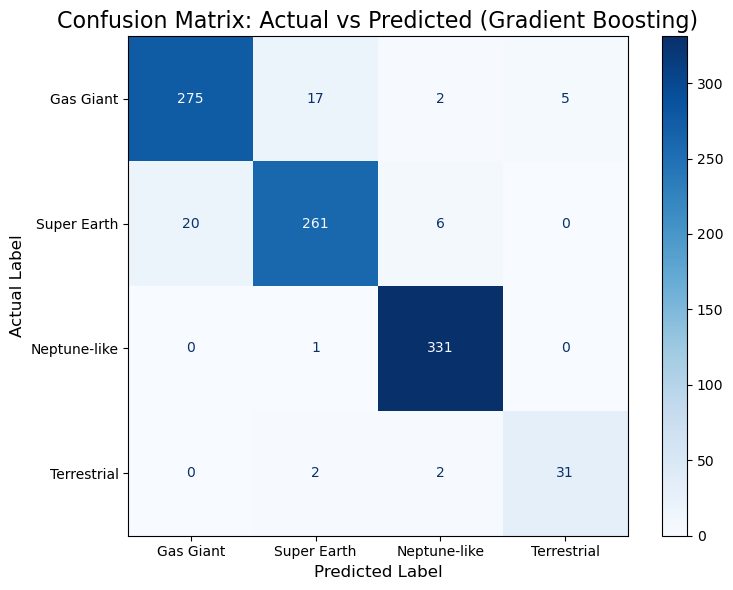

In [55]:
# confusion matrix

y_pred_gb = gradient_boosting_model.predict(X_test)

label_names = ['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']

conf_matrix = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title("Confusion Matrix: Actual vs Predicted (Gradient Boosting)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Feature Importances</h2>

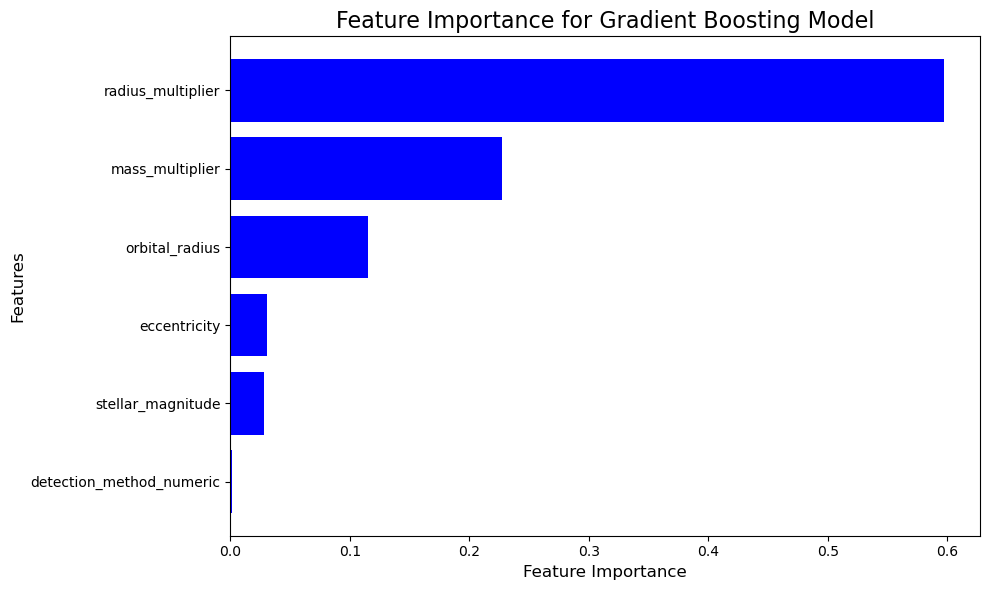

In [57]:
feature_importance = gradient_boosting_model.feature_importances_
features = X.columns

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='blue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Gradient Boosting Model', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">07 | Reporting</h1>

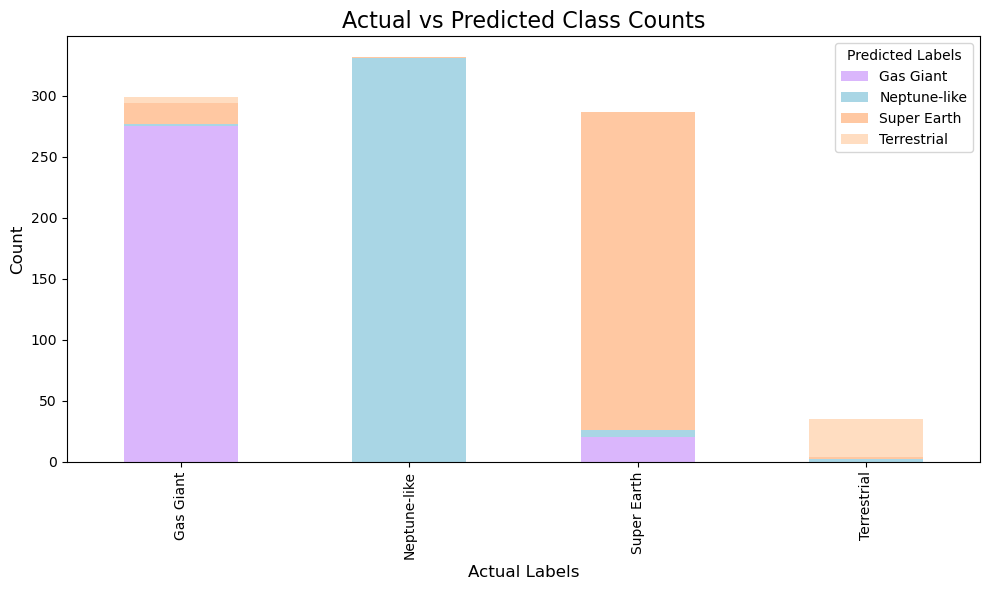

In [99]:
colors = ['#DAB6FC', '#A9D6E5', '#FFC8A2', '#FFDDC1']
label_names = ['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']

# numeric labels to real names
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})
results_df['Actual'] = results_df['Actual'].map({0: 'Gas Giant', 1: 'Super Earth', 2: 'Neptune-like', 3: 'Terrestrial'})
results_df['Predicted'] = results_df['Predicted'].map({0: 'Gas Giant', 1: 'Super Earth', 2: 'Neptune-like', 3: 'Terrestrial'})

counts = results_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

plt.title("Actual vs Predicted Class Counts", fontsize=16)
plt.xlabel("Actual Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Predicted Labels", fontsize=10)
plt.tight_layout()
plt.show()

In [60]:
import joblib

joblib.dump(gradient_boosting_model, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

In [61]:
# Load the saved Gradient Boosting model
#loaded_model = joblib.load('gradient_boosting_model.pkl')